# <span style="font-size:large-xx;">Machine Learning</span>
<div style="margin-top: -2em;"> <!-- Adjust the margin-top value as needed -->
</div> 

# <span style="font-size:large-xx;">MATH2319</span>
<div style="margin-top: 6em;"> <!-- Adjust the margin-top value as needed -->
</div> 

## Predicting Loan Approval Status
<div style="margin-top: -1.8em;"> <!-- Adjust the margin-top value as needed -->
</div> 

## Phase 1
<div style="margin-top: 6em;"> <!-- Adjust the margin-top value as needed -->
</div> 

#### Group 88
<div style="margin-top: -1em;"> <!-- Adjust the margin-top value as needed -->
</div> 

#### Kavinda Goonesekere S3987368
<div style="margin-top: -1em;"> <!-- Adjust the margin-top value as needed -->
</div> 

#### Kashish Gupta S4021816

---

## Table of Contents

1. Introduction
2. Objectives
3. Dataset Overview
    - Data Quality Report
    - Histogram Plots
    - Data Quality Plan
4. Data Cleaning and Preprocessing
    - Outlier Removal
    - Imputation of Missing Values
6. Data Exploration and Visualisation
    - Histogram and Bar Plots
    - Scatter Plot Matrix (SPLOM)
    - Pair-Wise Categorical Comparison Using Stacked Bar Plots
    - Pair-wise Continuous-Categorical Comparison Using Box Plots
    - Correlation Heat Map
    - Three-variable Comparison Using Grouped Scatter Plot
8. Integer Encoding
9. Literature Review
    - Factors Affecting Loan Approvals
    - Data Cleaning and Preprocessing
    - Exploratory Data Analysis and Visualisation
11. Conclusion
12. References

---


## Introduction

This report is concerned with the first phase of a machine learning project, which includes the data exploration and visualization of a loan approval dataset. Data exploration is a vital component of the machine learning pipeline and usually involves the significant portion of the time spent on a machine learning project. This report will provide an overview of the data and proceed to explore the data for any potential issues. The next stage will involve correcting such issues and visualizing the variables. A literature review exploring the theory behind both data preprocessing and loan approval research will be discussed in-depth. Finally any findings relevant to future work on a machine learning model will be briefly discussed. 

---

## Objectives

The primary purposes of this phase are as follows:
- Understand the context of the dataset and define features
- Identify any potential issues with the data
- Spot outliers
- Correct any problems that are discovered in the data
- Explore single variables using histograms and bar plots
- Explore correlations and trends between variable pairs
- Explore correlations and trends between three-variable groups
- Perform integer encoding for relevant categorical variables

---

## Dataset Overview

The Loan Approval Prediction Dataset has been sourced from Kaggle (Sharma 6207, 2023). This dataset contains the information of 953 applicants for a loan approval. The dataset is loaded into the environment and some basic summary statistics are created. The dataset has a total of 953 rows, of which the first 10 rows are displayed below:

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.set_option('display.max_columns', None) 
import numpy as np 

loan = pd.read_csv("Phase1_Group88.csv")
print(loan.dtypes)
print(loan.describe())
display(loan.head(10))

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       953.000000         953.000000  921.000000        935.000000   
mean       5433.144806        1671.703085  146.163952        340.979679   
std        6288.391469        3164.094759   84.654966         65.987724   
min         150.000000           0.000000    9.000000         12.000000   
25%        2873.000000           0.000000  100.000000        360.000000   
50%        3775.000000        1250.000000  128.000000        360.000000   
75%        5818.000000        2306.000000  166.000000        360.000000   
max      

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

The columns of the dataset are explained below:

Table 1: Feature overview
| Feature Name      | Data Type | Units                       | Description                                         |
|:------------------|-----------|-----------------------------|-----------------------------------------------------|
| Loan_ID           | Object    | -                           | A unique identifier for loan instance               | 
| Gender            | Object    | -                           | Gender of applicant                                 |
| Married           | Object    | -                           | Marriage status of applicant                        |
| Dependents        | Object    | -                           | Number of dependents for applicant                  |
| Education         | Object    | -                           | Applicant's maximum education level                 |
| Self_Employed     | Object    | -                           | Identifier for whether applicant is self-employed   |
| ApplicantIncome   | Int64     | Unknown                     | Applicant income, currency unknown                  |
| CoapplicantIncome | Float64   | Unknown                     | Coapplicant income, currency unknown                |
| LoanAmount        | Float64   | Thousands, currency unknown | Loan amount in thousands, currency unknown          |
| Loan_Amount_Term  | Float64   | Months                      | Loan period in months                               |
| Credit_History    | Float64   | -                           | Identifier for whether applicant has credit history |
| Property_Area     | Object    | -                           | Type of property owned by applicant                 |
| Loan_Status       | Object    | -                           | Identifier for whether the loan was approved or not |

The target variable for this dataset is Loan_Status, containing two levels describing whether the loan was approved or not using "Y" for yes and "N" for no. The "Loan_ID" column is dropped since it is simply an identifier for data points and does not serve as a predictor variable for loan status.

In [3]:
loan = loan.drop(['Loan_ID'], axis=1)

The continuous features are separated out into a variable called cont_feat.

In [4]:
cont_feat = loan[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
cont_feat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


The categorical features are separated out into a variable called cat_feat.

In [5]:
cat_feat = loan[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Amount_Term"]]
cat_feat.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term
0,Male,No,0,Graduate,No,1.0,Urban,360.0
1,Male,Yes,1,Graduate,No,1.0,Rural,360.0
2,Male,Yes,0,Graduate,Yes,1.0,Urban,360.0
3,Male,Yes,0,Not Graduate,No,1.0,Urban,360.0
4,Male,No,0,Graduate,No,1.0,Urban,360.0


### Data Quality Report

Relevant summary statistics for all the continuous variables are displayed below in Table 2 as a data quality report. There seems to be a large range for ApplicantIncome and CoapplicantIncome, where their maximum values are very large compared to the 3rd quartiles. Similarly, the minimum value for ApplicantIncome is quite low compared to the 1st quartile, suggesting lower outliers. The minimum CoapplicantIncome value is 0, which is justified since some co-applicants may not have jobs. LoanAmount has 3.4% of its values missing but the other two continuous variables do not have missing values. The cardinality of all three continuous variables are not irregular.

In [6]:
import tabulate
from IPython.display import display, Markdown

cont_pivoted = cont_feat.melt(ignore_index=False).reset_index()

def q25(x):
    return x.quantile(0.25)
def q75(x):
    return x.quantile(0.75)
def missing(x):
    return str((100*x.isna().sum()/np.size(x)).round(1)) + '%'
    
grouped = cont_pivoted.groupby('variable').agg(
    Count=('value', np.size),
    PctMissing=('value', missing),
    Cardinality=('value', pd.Series.nunique),
    Minimum=('value', np.min),
    FirstQrt=('value', q25),
    Mean=('value', np.mean),
    Median=('value', np.median),
    ThirdQrt=('value', q75),
    Maximum=('value', np.max),
    Std=('value', np.std))

display(Markdown("Table 2: Data quality report - continuous variables"))
display(Markdown(grouped.reset_index().to_markdown(index=False)))

Table 2: Data quality report - continuous variables

| variable          |   Count | PctMissing   |   Cardinality |   Minimum |   FirstQrt |     Mean |   Median |   ThirdQrt |   Maximum |      Std |
|:------------------|--------:|:-------------|--------------:|----------:|-----------:|---------:|---------:|-----------:|----------:|---------:|
| ApplicantIncome   |     953 | 0.0%         |           508 |       150 |       2873 | 5433.14  |     3775 |       5818 |     81002 | 6288.39  |
| CoapplicantIncome |     953 | 0.0%         |           289 |         0 |          0 | 1671.7   |     1250 |       2306 |     41667 | 3164.09  |
| LoanAmount        |     953 | 3.4%         |           203 |         9 |        100 |  146.164 |      128 |        166 |       700 |   84.655 |

Relevant summary statistics for all the categorical variables are displayed below in a data quality report. The only categoricals with no missing values are Education and Property_area; all others have relatively low rates of missing values. Unique values are counted in each categorical column to check for irregular cardinality which occurs when a categorical variable has an unexpectedly high number of unique values. According to the result, there is no irregular cardinality as the number of unique values for each categorical variable are within bounds. Credit_History, Education, Gender, Loan_Amount_Term, and Self_Employed all have high frequency occurrences for the first mode (>75%), suggesting that there is no even distribution of levels for these variables. 

In [7]:
cat_pivoted = cat_feat.melt(ignore_index=False).reset_index()

def modeFreq(x):
    mode = x.mode()[0]
    return x[x == mode].count()

def modePct(x):
    mode = x.mode()[0]
    return str((100*x[x == mode].count()/np.size(x)).round(1)) + '%'

def secondMode(x):
    mode = x.mode()[0]
    x = x[x != mode]
    return x.mode()[0]
    
def secondModeFreq(x):
    mode = secondMode(x)
    return x[x == mode].count()

def secondModePct(x):
    mode = secondMode(x)
    return str((100*x[x == mode].count()/np.size(x)).round(1)) + '%'
    
grouped = cat_pivoted.groupby('variable').agg(
    Count=('value', np.size),
    PctMissing=('value', missing),
    Cardinality=('value', pd.Series.nunique),
    Mode=('value', pd.Series.mode),
    ModeFreq=('value', modeFreq),
    ModePct=('value', modePct),
    SecondMode=('value', secondMode),
    SecondModeFreq=('value', secondModeFreq),
    SecondModePct=('value', secondModePct))

display(Markdown("Table 3: Data quality report - categorical variables"))
display(Markdown(grouped.reset_index().to_markdown(index=False))) 

Table 3: Data quality report - categorical variables

| variable         |   Count | PctMissing   |   Cardinality | Mode      |   ModeFreq | ModePct   | SecondMode   |   SecondModeFreq | SecondModePct   |
|:-----------------|--------:|:-------------|--------------:|:----------|-----------:|:----------|:-------------|-----------------:|:----------------|
| Credit_History   |     953 | 8.5%         |             2 | 1.0       |        723 | 75.9%     | 0.0          |              149 | 15.6%           |
| Dependents       |     953 | 2.4%         |             4 | 0         |        524 | 55.0%     | 2            |              167 | 17.5%           |
| Education        |     953 | 0.0%         |             2 | Graduate  |        735 | 77.1%     | Not Graduate |              218 | 22.9%           |
| Gender           |     953 | 2.5%         |             2 | Male      |        754 | 79.1%     | Female       |              175 | 18.4%           |
| Loan_Amount_Term |     953 | 1.9%         |            10 | 360.0     |        792 | 83.1%     | 180.0        |               70 | 7.3%            |
| Married          |     953 | 0.4%         |             2 | Yes       |        622 | 65.3%     | No           |              327 | 34.3%           |
| Property_Area    |     953 | 0.0%         |             3 | Semiurban |        360 | 37.8%     | Rural        |              300 | 31.5%           |
| Self_Employed    |     953 | 5.2%         |             2 | No        |        769 | 80.7%     | Yes          |              134 | 14.1%           |

The number of outliers are calculated for each continuous variable by defining upper and lower bounds based on the interquartile range (IQR). The resulting counts of outliers for each feature is listed in Table 4:

In [8]:
outlier_list = []
for col in cont_feat:
    
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = cont_feat[col].quantile(0.25)
    Q3 = cont_feat[col].quantile(0.75)
    
    #interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Defining the upper and lower bounds for clamping
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # count of outliers before clamping
    outlier_list.append(((cont_feat[col] < lower_bound) | (cont_feat[col] > upper_bound)).sum())

outlier_counts = pd.DataFrame(
    {'Feature': cont_feat.columns,
     'Outlier Count': outlier_list
    }).sort_values(by=['Outlier Count'], ascending=False)

display(Markdown("Table 4: Outlier counts for continuous variables"))
display(Markdown(outlier_counts.to_markdown(index=False)))

Table 4: Outlier counts for continuous variables

| Feature           |   Outlier Count |
|:------------------|----------------:|
| ApplicantIncome   |              78 |
| LoanAmount        |              60 |
| CoapplicantIncome |              29 |

The number of missing values are calculated for each variable and listed in Table 5:

In [9]:
def missingCount(x):
    return x.isna().sum()

loan_pivoted = loan.melt(ignore_index=False).reset_index()

missing_counts = loan_pivoted.groupby('variable').agg(
    Missing_Count=('value', missingCount)).sort_values(by=['Missing_Count'], ascending=False)

display(Markdown("Table 5: Missing counts for all variables"))
display(Markdown(missing_counts.reset_index().to_markdown(index=False)))

Table 5: Missing counts for all variables

| variable          |   Missing_Count |
|:------------------|----------------:|
| Credit_History    |              81 |
| Self_Employed     |              50 |
| LoanAmount        |              32 |
| Gender            |              24 |
| Dependents        |              23 |
| Loan_Amount_Term  |              18 |
| Married           |               4 |
| ApplicantIncome   |               0 |
| CoapplicantIncome |               0 |
| Education         |               0 |
| Loan_Status       |               0 |
| Property_Area     |               0 |

To understand how to impute continuous variables, it is important to know how the variable is distributed since symmetrical distributions require mean imputation and skewed distributions require mode imputation. The distribution of LoanAmount is plotted below:

Skewness of LoanAmount: 2.595731874871244


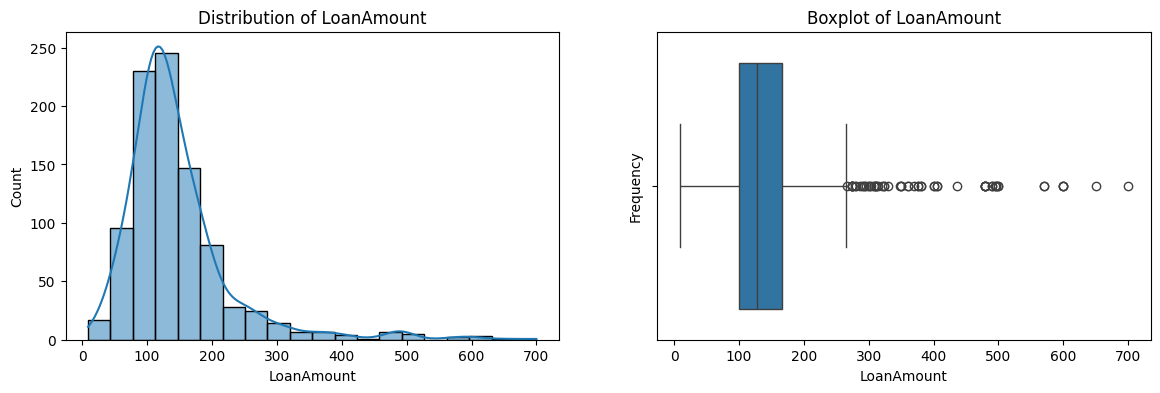

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing LoanAmount distribution

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14, 4))
sns.histplot(loan['LoanAmount'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')

# Checking for outliers (e.g., using boxplot)
sns.boxplot(x=loan['LoanAmount'], ax=axes[1])
axes[1].set_title('Boxplot of LoanAmount')
plt.xlabel('LoanAmount')

# Checking skewness
print("Skewness of LoanAmount:", loan['LoanAmount'].skew())

Figure 1: Distribution and boxplot for LoanAmount

The missing values in the categorical columns such as ‘Gender’, ‘Married’, ‘Dependents’, ‘Self Employed’ etc. can be handled by mode imputation which involves replacing the missing values with the most frequent value in the column. The missing values in LoanAmount can be handled through median imputation as it can be seen through the histogram that the distribution is skewed. In this method, the middle value of the existing data points in the same column is used to replace missing values. Median imputation is less sensitive to outliers.

### Data quality plan

Based on the results obtained so far, a data quality plan is created for the issues observed in the dataset and shown in Table 6:

In [11]:
feature1 = outlier_counts[(outlier_counts['Outlier Count'] != 0)]['Feature']
feature2 = missing_counts[(missing_counts['Missing_Count'] != 0)].reset_index()['variable']
features = pd.concat([feature1,feature2])

issues = ["Outliers", "Outliers", "Outliers", "Missing values", "Missing values", "Missing values", "Missing values", "Missing values", "Missing values", "Missing values"]
strategies = ["Clamp transformation", "Clamp transformation", "Clamp transformation", "Mode Imputation", "Mode Imputation", "Median Imputation", "Mode Imputation", "Mode Imputation", "Mode Imputation", "Mode Imputation"]

quality_plan = pd.DataFrame(
    {'Feature': features,
     'Data Quality Issue': issues,
     'Potential Handling Strategies':strategies 
    })

display(Markdown("Table 6: Data quality plan"))
display(Markdown(quality_plan.to_markdown(index=False)))

Table 6: Data quality plan

| Feature           | Data Quality Issue   | Potential Handling Strategies   |
|:------------------|:---------------------|:--------------------------------|
| ApplicantIncome   | Outliers             | Clamp transformation            |
| LoanAmount        | Outliers             | Clamp transformation            |
| CoapplicantIncome | Outliers             | Clamp transformation            |
| Credit_History    | Missing values       | Mode Imputation                 |
| Self_Employed     | Missing values       | Mode Imputation                 |
| LoanAmount        | Missing values       | Median Imputation               |
| Gender            | Missing values       | Mode Imputation                 |
| Dependents        | Missing values       | Mode Imputation                 |
| Loan_Amount_Term  | Missing values       | Mode Imputation                 |
| Married           | Missing values       | Mode Imputation                 |


---

## Data Cleaning and Preprocessing 

### Outlier Removal

The outliers for the continuous variables are removed using the clamp transformation shown below:

In [12]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

outliers_counts_before_clamping = {}
outliers_counts_after_clamping = {}

for col in numerical_cols:
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    
    #interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Defining the upper and lower bounds for clamping
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # count of outliers before clamping
    outliers_before_clamping = ((loan[col] < lower_bound) | (loan[col] > upper_bound)).sum()
    outliers_counts_before_clamping[col] = outliers_before_clamping
    
    # Clamping the values beyond the bounds
    loan[col] = loan[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Count of outliers after clamping
    outliers_after_clamping = ((loan[col] < lower_bound) | (loan[col] > upper_bound)).sum()
    outliers_counts_after_clamping[col] = outliers_after_clamping

# Check the dataset after clamping
print("Outliers counts before clamping for each numerical column:")
for col, count in outliers_counts_before_clamping.items():
    print(f"{col}: {count}")

print("Outliers counts after clamping for each numerical column:")
for col, count in outliers_counts_after_clamping.items():
    print(f"{col}: {count}")

Outliers counts before clamping for each numerical column:
ApplicantIncome: 78
CoapplicantIncome: 29
LoanAmount: 60
Outliers counts after clamping for each numerical column:
ApplicantIncome: 0
CoapplicantIncome: 0
LoanAmount: 0


### Imputation of Missing Values

The missing values in the dataset are imputed according to the strategies outlined in the data quality plan in Table 6:

In [13]:
from sklearn.impute import SimpleImputer

# Defining the imputation strategy
mode_imputer = SimpleImputer(strategy='most_frequent')  # for categorical variables
median_imputer = SimpleImputer(strategy='median')  # for numerical variables

# Columns for mode imputation
mode_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

# Columns for median imputation
median_cols = ['LoanAmount']

# Applying imputation to the dataset
loan[mode_cols] = mode_imputer.fit_transform(loan[mode_cols])
loan[median_cols] = median_imputer.fit_transform(loan[median_cols])

# Checking to see if there are any missing values after imputation
print(loan.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64



---

## Data Exploration and Visualisation

### Histogram and Bar Plots

Histograms for all the continuous variables and bar plots for the categorical variables are plotted below in Figure 1 to provide an idea of the frequency of occurrence for each. All continuous variables seem skewed. There are significantly more male than female applicants in this dataset. There are about twice as many married applicants as unmarried. A majority of the applicants have 0 dependents and are graduates. A majority of the aplicants are self-employed and a majority have a credit history. The distribution of property types is roughly even between Rural, Semiurban, and Urban. A vast majority of the loan terms are 360 months.  

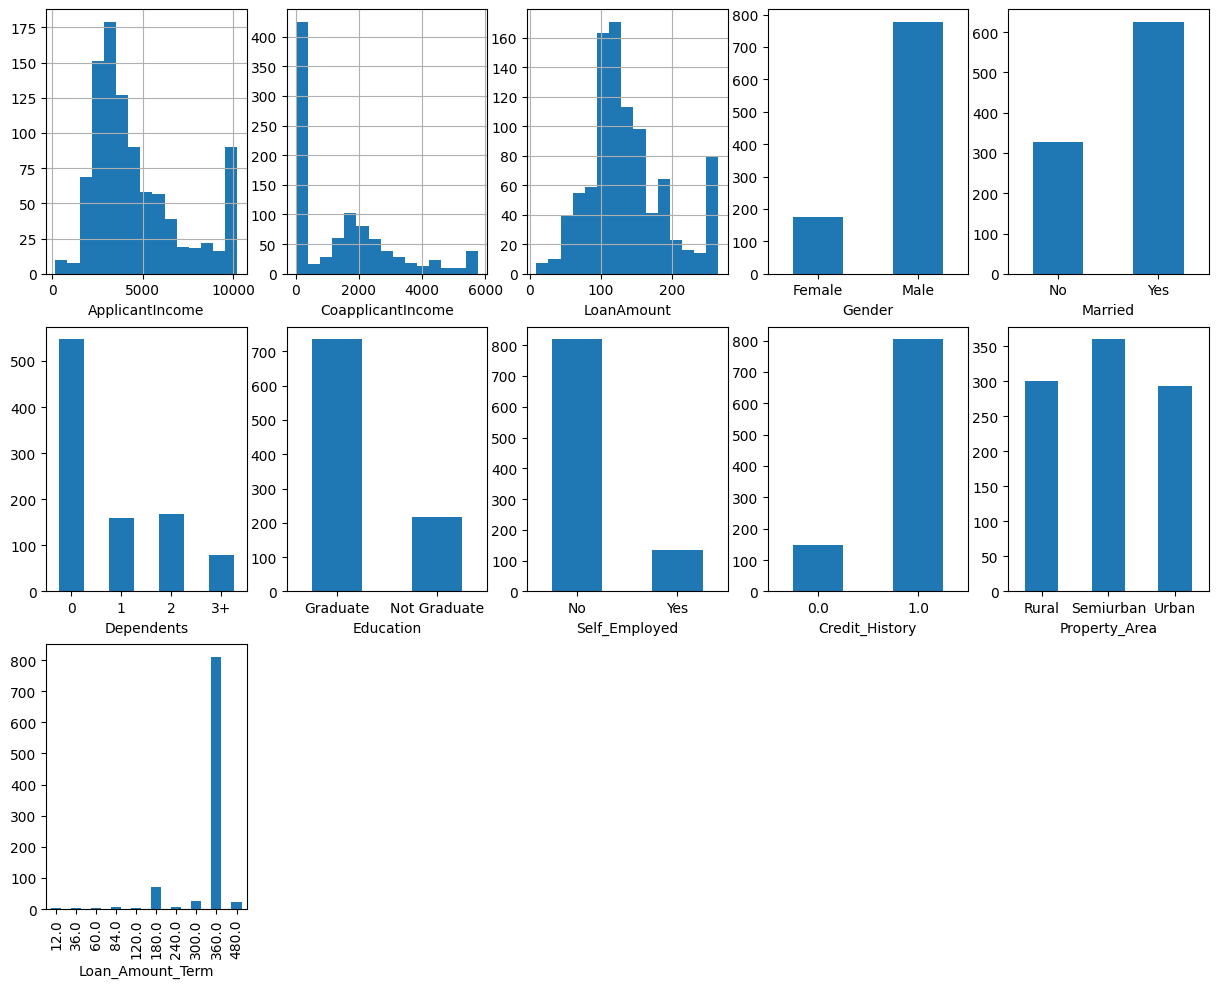

In [14]:
# Updating cont_feat and cat_feat
cont_feat = loan[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
cat_feat = loan[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area", "Loan_Amount_Term"]]

# Plot histograms for continuous variables
fig, axes = plt.subplots(nrows=3, ncols=5, sharey=False, figsize=(15, 9))
plt.subplots_adjust(top=5, bottom=4)

for i, col in enumerate(cont_feat):
    cont_feat[col].hist(ax=axes[0,i], bins = 15).set_xlabel(col)
    
# Plot bar plots for categorical variables
i=0
j=3
for col in cat_feat:
    cat_feat[col].value_counts().sort_index().plot(kind='bar', ax=axes[i, j])
    axes[i][j].tick_params(axis='x', rotation=0)
    plt.xlabel(col)
    j += 1
    if j == 5:
        j = 0
        i += 1
        
axes[2][0].tick_params(axis='x', rotation=90) 
axes[2][1].remove()
axes[2][2].remove()
axes[2][3].remove()
axes[2][4].remove()

Figure 2: Histograms for continuous and bar plots for categorical variables

### Scatter Plot Matrix (SPLOM)

The Scatter Plot Matrix (SPLOM) allows for continuous variables to be compared pair-wise, to visualise whether there are any relationships between each pair. The SPLOM for the continuous variables is shown below in Figure 3 and demonstrates that ApplicantIncome and LoanAmount seem to have a linear relationship. To a lesser degree, it can be said that even CoapplicantIncome and LoanAmount have a linear relationship.

array([[<Axes: xlabel='ApplicantIncome', ylabel='ApplicantIncome'>,
        <Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>,
        <Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>],
       [<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>,
        <Axes: xlabel='CoapplicantIncome', ylabel='CoapplicantIncome'>,
        <Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>],
       [<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>,
        <Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>,
        <Axes: xlabel='LoanAmount', ylabel='LoanAmount'>]], dtype=object)

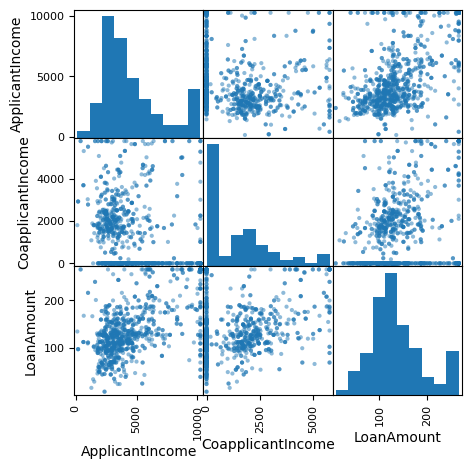

In [15]:
pd.plotting.scatter_matrix(cont_feat, figsize=(5,5))

Figure 3: SPLOM for continuous variables

### Pair-Wise Categorical Comparison Using Stacked Bar Plots

Categoricals can be compared pair-wise with each other through the use of 100% stacked bar plots which compare the occurrences of a variable across the levels of another. All the pair-wise combinations of the available categorical variables are plotted below in Figure 4. From all the combinations plotted, the following shown in Table 7 demonstrated significant deviations across classes, indicating that there is a relationship between the categorical pairs:

Table 7: Categorical relationships
| Categorical Pair      | Relationship                               |
|-----------------------|--------------------------------------------|
| Married-Gender        | A much larger proportion of female applicants are unmarried compared to male applicants |
| Dependents-Gender     | Female applicants have primarily 0 or 1 dependents while males have a more even distribution of number of dependents |
| Married-Dependents    | Unmarried applicants have primarily 0 or 1 dependents while married applicants have a more even distributions of number of dependents |

All other variable pairs tested have roughly similar distributions across classes.

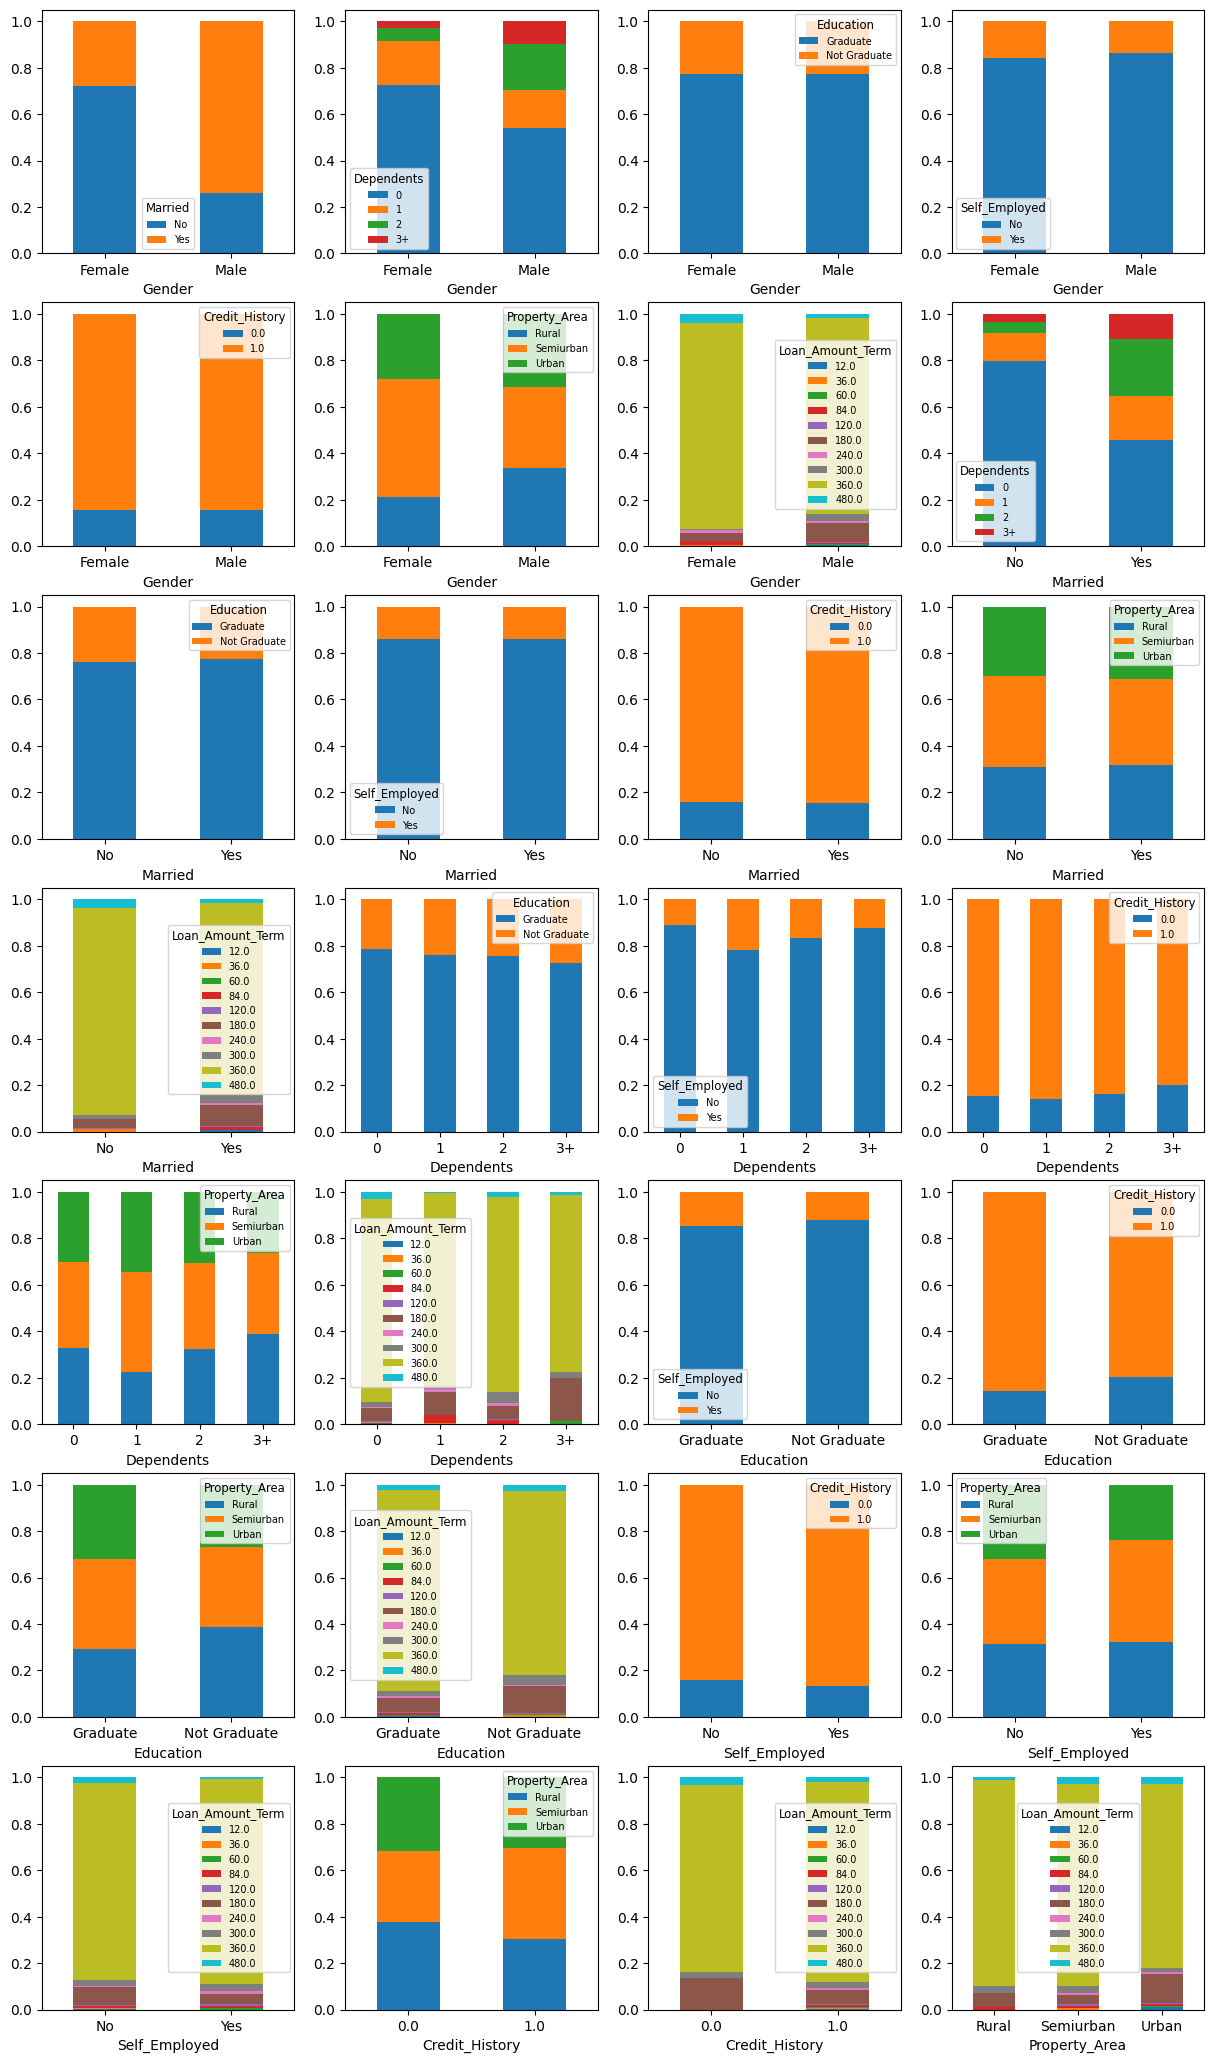

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots( nrows=7, ncols=4, sharey=False, figsize=(15, 10))
plt.subplots_adjust(top=12, bottom=10)

i = 0
j = -1
cols = []
for col1 in cat_feat.columns:
    for col2 in cat_feat.columns:
        if col1 == col2 or col2 in cols: 
            continue
        j += 1
        df_pct = cat_feat.groupby([col1, col2]).size()/cat_feat.groupby([col1]).size()
        df_pct.unstack().plot.bar(stacked=True, ax=axes[i, j])
        if col1 == 'Loan_Amount_Term':
            axes[i][j].tick_params(axis='x', rotation=90)
        else:
            axes[i][j].tick_params(axis='x', rotation=0)
        axes[i][j].legend(loc='best', prop={'size': 7}, title=col2, title_fontsize='small')
        if j == 3:
            i += 1
            j = -1
    cols.append(col1) 

Figure 4: Pair-wise bar plots for categorical variables

### Pair-wise Continuous-Categorical Comparison Using Box Plots

Categoricals and continuous variables can be compared pair-wise with each other through the use of grouped box plots which compare the distribution of a continuous variable across the levels of a categorical variable. All the pair-wise combinations of the available continuous-categorical variable pairs are plotted below in Figure 5. From all the combinations plotted, the following shown in Table 8 demonstrated significant deviations across classes, indicating that there is a relationship between the continuous-categorical pairs:

Table 8: Continuous-Categorical relationships
| Categorical Pair      | Relationship                               |
|-----------------------|--------------------------------------------|
| ApplicantIncome-Gender        | Males have slightly higher mean income and wider IQR |
| ApplicantIncome-Dependents     | Applicant income seems to rise with number of dependents |
| ApplicantIncome-Education    | Graduate applicants have higher mean income and wider IQR compared to non-graduate |
| ApplicantIncome-Self_Employed    | Self-employed applicants have much higher mean income and wider IQR compared to others |
| ApplicantIncome-Loan_Amount_Term    | Different loan terms have different means and IQRs but no discernible pattern between them |
| CoapplicantIncome-Gender    | Mean co-applicant income is higher for male applicants than females |
| CoapplicantIncome-Married    | Mean co-applicant income is higher for married applicants than unmarried |
| CoapplicantIncome-Self_Employed    | Mean co-applicant income is lower for self-employed applicants than others |
| CoapplicantIncome-Loan_Amount_Term    | Different loan terms have different means and IQRs but no discernible pattern between them |
| LoanAmount-Gender    | Male applicants on average request for larger loan amounts than female applicants |
| LoanAmount-Married    | Married applicants on average request for larger loan amounts than unmarried applicants |
| LoanAmount-Education    | Graduate applicants on average request for slightly larger loan amounts and have larger IQR than non-graduate applicants|
| LoanAmount-Self_Employed    | Self-employed applicants on average request for larger loan amounts than other applicants |
| LoanAmount-Loan_Amount_Term    | Different loan terms have different means and IQRs but no discernible pattern between them |

All other variable pairs tested did not show significant differences in continuous variable distribution across the categorical variable.

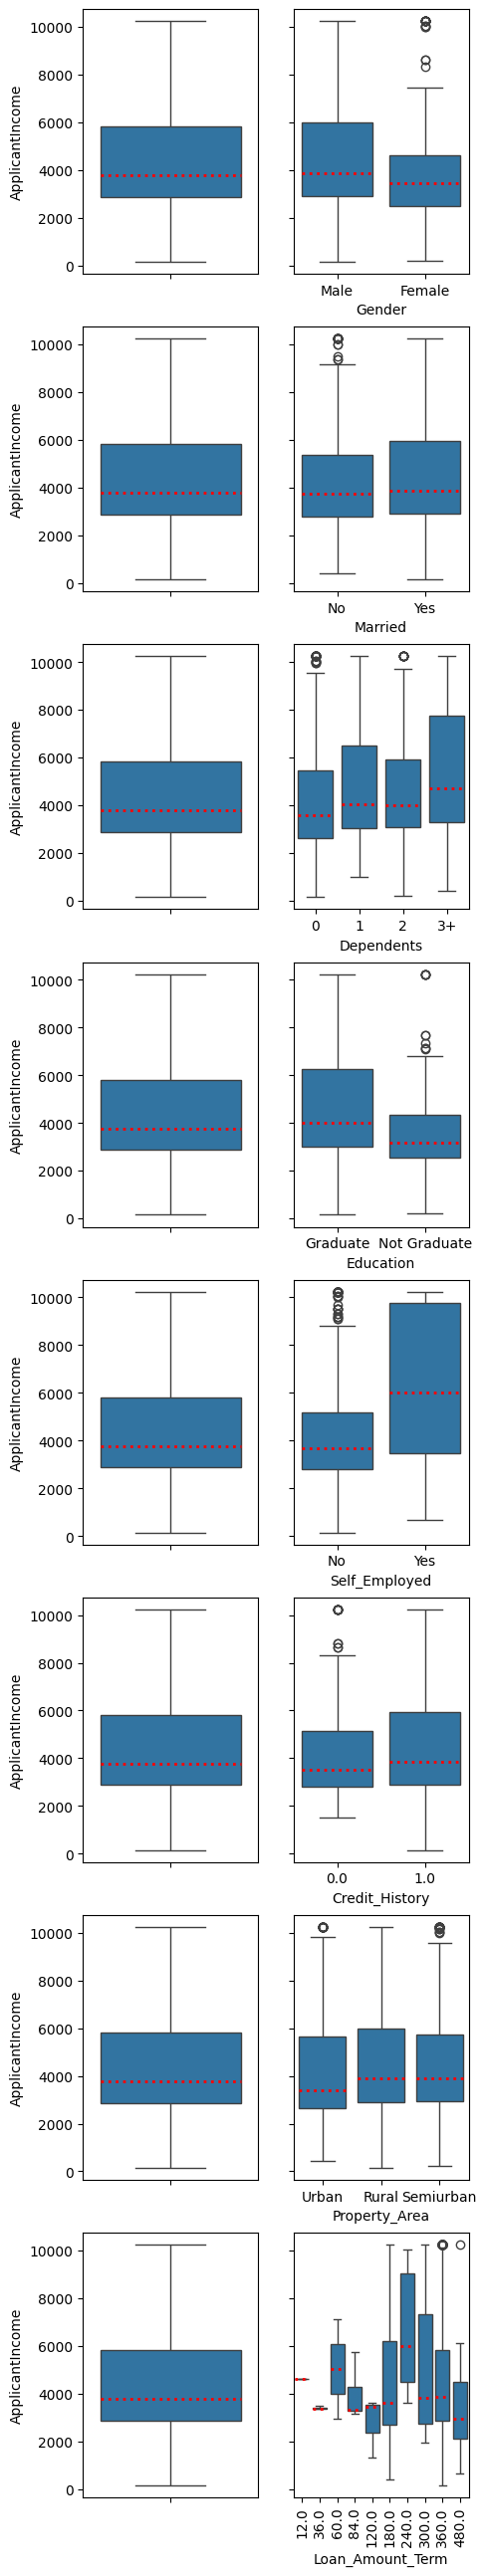

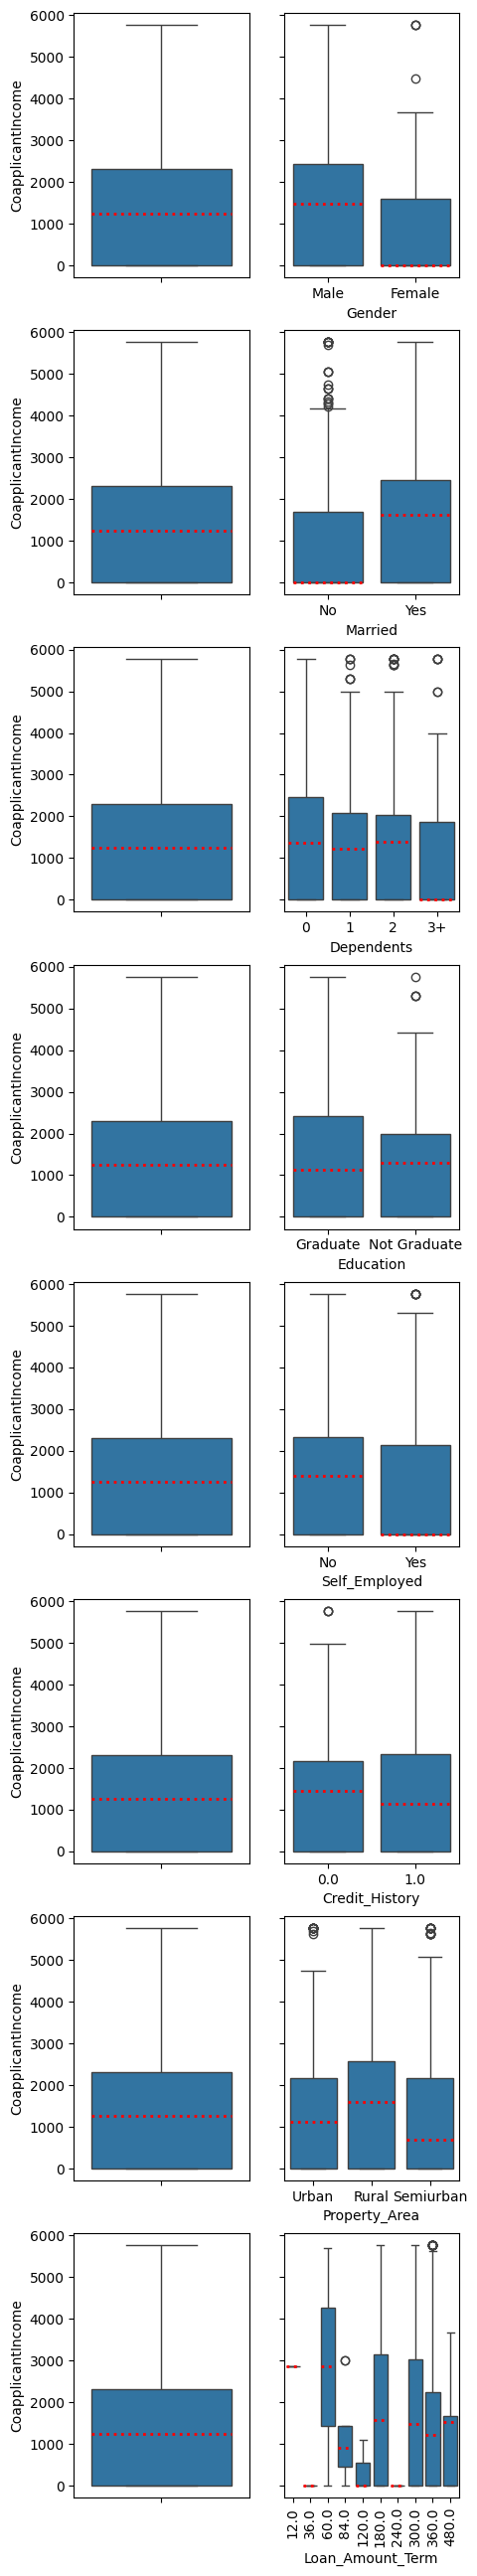

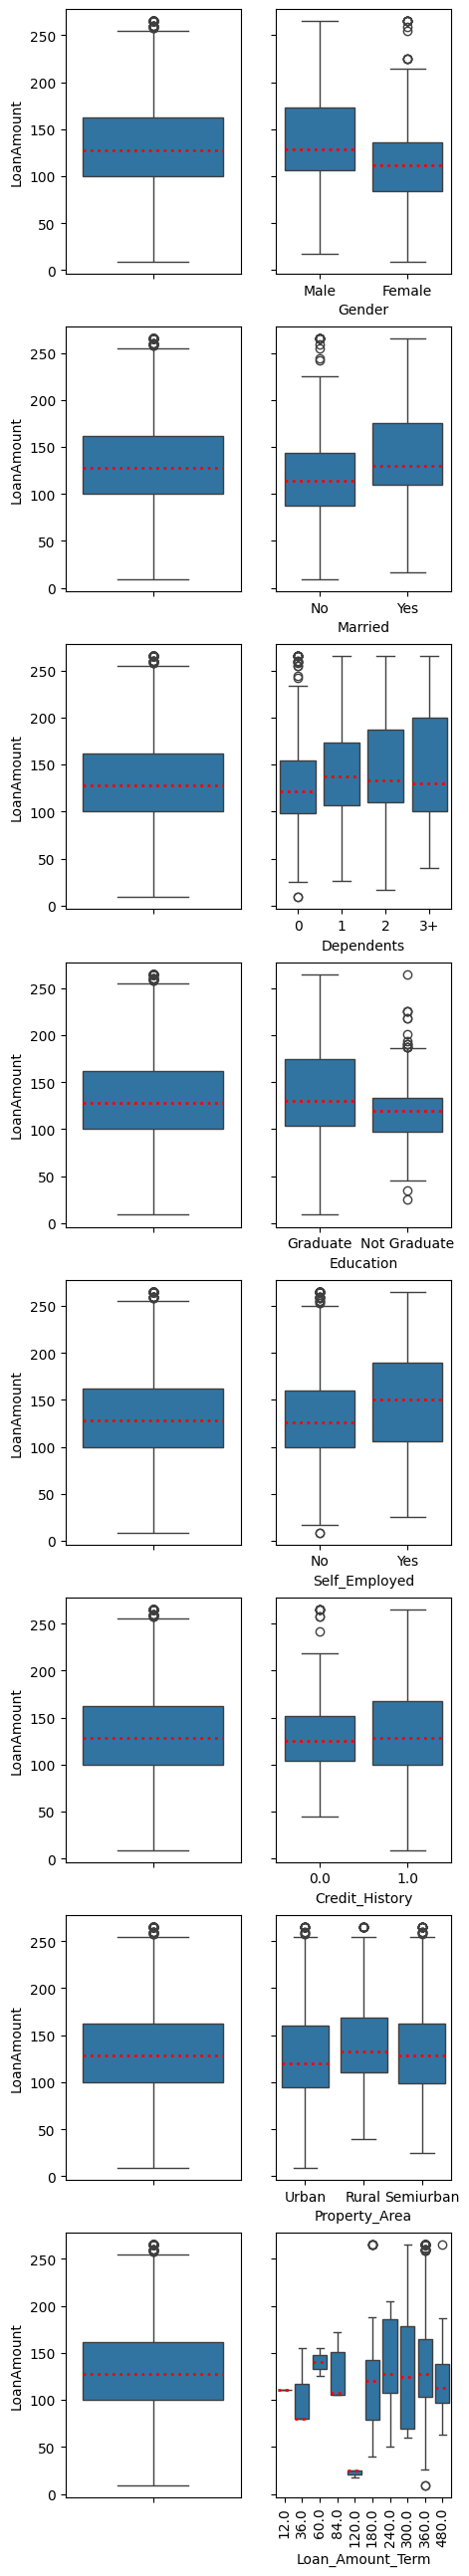

In [17]:
import seaborn as sns

fig, axes = plt.subplots( nrows=8, ncols=2, sharey=True, figsize=(5, 25))
plt.subplots_adjust(top=10, bottom=9)
for i, col in enumerate(cat_feat.columns):
    sns.boxplot(ax=axes[i,0], data=loan, y='ApplicantIncome', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
    sns.boxplot(ax=axes[i,1], data=loan, x=col, y='ApplicantIncome', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
axes[7][1].tick_params(axis='x', rotation=90)

fig, axes = plt.subplots( nrows=8, ncols=2, sharey=True, figsize=(5, 25))
plt.subplots_adjust(top=6, bottom=5)
for i, col in enumerate(cat_feat.columns):
    sns.boxplot(ax=axes[i,0], data=loan, y='CoapplicantIncome', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
    sns.boxplot(ax=axes[i,1], data=loan, x=col, y='CoapplicantIncome', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
axes[7][1].tick_params(axis='x', rotation=90)

fig, axes = plt.subplots( nrows=8, ncols=2, sharey=True, figsize=(5, 25))
plt.subplots_adjust(top=6, bottom=5)
for i, col in enumerate(cat_feat.columns):
    sns.boxplot(ax=axes[i,0], data=loan, y='LoanAmount', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
    sns.boxplot(ax=axes[i,1], data=loan, x=col, y='LoanAmount', medianprops={'color': 'red', 'ls': ':', 'lw': 2})
axes[7][1].tick_params(axis='x', rotation=90)

Figure 5: Box plots for continuous-categorical pairs

### Correlation Heat Map

Continuous variables can be correlated with each other using a correlation heatmap. The correlation heat map for the continuous variables is plotted below in Figure 6. It shows that CoapplicantIncome and ApplicantIncome are slightly somewhat correlated (-0.22), CoapplicantIncome and LoanAmount are somewhat positively correlated (0.27), and ApplicantIncome and LoanAmount are significantly positively correlated (0.55).

<Axes: >

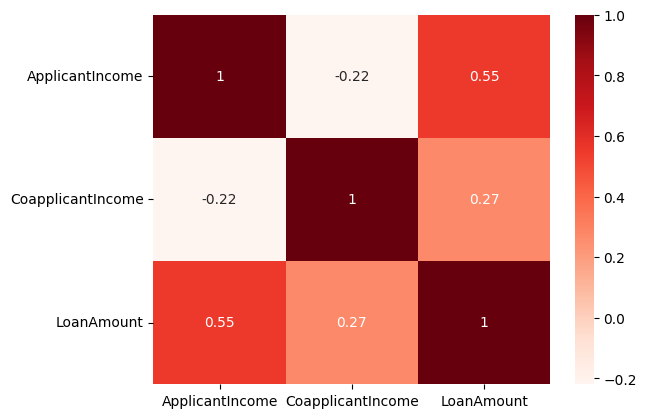

In [18]:
corr = cont_feat.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

Figure 6: Correlation Heatmap for continuous variables

### Three-variable Comparison Using Grouped Scatter Plot

The continuous variable combination to use for 3-variable comparison was determined to be LoanAmount and ApplicantIncome based on the correlation heat map in Figure 6. Three categorical variables were selected based on common continuous-categorical relationships reported in Table 8. For instance, the categoricals Gender, Education, and Self_Employed all showed relationships with both LoanAmount and ApplicantIncome and therefore were chosen for the 3-variable comparisons carried out below in Figure 7. Loan_Amount_Term was not considered since the majority of data points had a Loan_Amount_Term of 360 which introduces the possiblity of superfluous relationships being observed when comparing it with continuous variables. 

Unfortunately, the relationships between the 3 variables are not very clear with each plot. The plot for LoanAmount-ApplicantIncome-Gender does not show much of a visible relationship. The plot for LoanAmount-ApplicantIncome-Education shows more non-graduates in the lower end for both continuous variables but this is not a strong relationship visually. The plot for LoanAmount-ApplicantIncome-Self_Employed shows that more self-employed applicants have higher income but once again, the relationship is not strong visually.


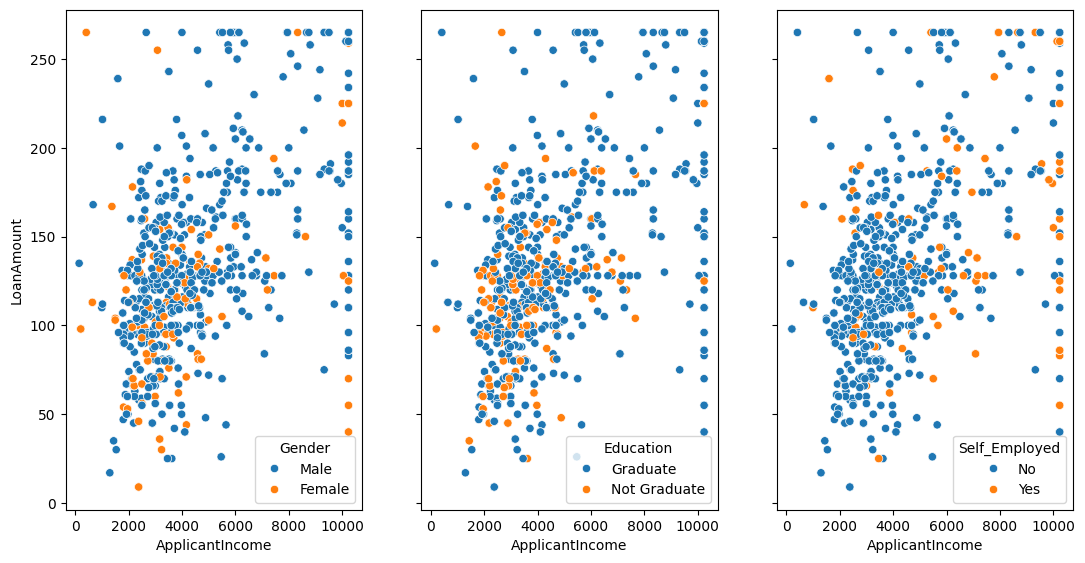

In [19]:
categoricals = ['Gender', 'Education', 'Self_Employed']

fig, axes = plt.subplots( nrows=1, ncols=3, sharey=True, figsize=(13, 5))
plt.subplots_adjust(top=10, bottom=9)

for i, col in enumerate(categoricals):
    sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue=col, data=loan, ax=axes[i]) 

Figure 7: ApplicantIncome vs LoanAmount scatter plots plotted for Gender, Education, and Self-Employed

---

## Integer Encoding

Certain categorical columns must undergo integer encoding before modelling is performed. Gender, Married, Education, Self-Employed, and Credit_History are binary variables and therefore require integer encoding. Since Credit_History is already integer encoded, it will be left as it is. Loan_Status being the target variable must also be integer encoded. Dependents and Loan_Amount_Term are ordinal and can also be encoded with integer encoding. These are performed in the cell below:

One-hot-encoding and scaling will be performed in Phase 2 of the project.

In [20]:
gender_mapping = {'Male': 1, 'Female': 0}
married_mapping = {'Yes': 1, 'No': 0}
dependents_mapping = {'0': 0, '1': 1, '2':2, '3+':3}
education_mapping = {'Graduate': 1, 'Not Graduate': 0}
self_employed_mapping = {'Yes': 1, 'No': 0}
loan_amount_term_mapping = {12:0, 36:1, 60:2, 84:3, 120:4, 180:5, 240:6, 300:7, 360:8, 480:9}
loan_status_mapping = {'Y': 1, 'N': 0}

loan['Gender'] = loan['Gender'].replace(gender_mapping)
loan['Married'] = loan['Married'].replace(married_mapping)
loan['Dependents'] = loan['Dependents'].replace(dependents_mapping)
loan['Education'] = loan['Education'].replace(education_mapping)
loan['Self_Employed'] = loan['Self_Employed'].replace(self_employed_mapping)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].replace(loan_amount_term_mapping)
loan['Loan_Status'] = loan['Loan_Status'].replace(loan_status_mapping)

loan.iloc[0:5, [0,1,2,3,4,8,9,11]]

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,1,0,8.0,1.0,1
1,1,1,1,1,0,8.0,1.0,0
2,1,1,0,1,1,8.0,1.0,1
3,1,1,0,0,0,8.0,1.0,1
4,1,0,0,1,0,8.0,1.0,1



---

## Literature Review

Loan approval prediction is a crucial aspect of any financial institutions' decision-making processes and risk management strategies. Machine learning models trained on historical loan application data can effectively assess an applicant's creditworthiness, leading to informed loan approval decisions. Data cleaning, preprocessing, exploration, and visualization are essential stages in preparing datasets for successful predictive modeling tasks. Raw data often contains inconsistencies, errors, and missing values that can significantly impact model performance. This literature review aims to provide insights into existing research studies focusing on these stages, with particular attention to their application in predictive modeling tasks as well as the factors that affect loan approvals for individuals.

### Factors Affecting Loan Approvals

Obtaining loan approval is crucial for individuals seeking financial resources. Lenders assess various factors before granting a loan. 

* Creditworthiness is one of the most important factors impacting loan approvals. Credit scores include a borrower's past repayment history and debt management and they serve as a crucial indicator of creditworthiness. A strong credit score signifies responsible financial behavior and increases the likelihood of loan approval. Credit history can disadvantage specific demographics, highlighting the need for potential improvements in lending practices (Schauer & Soden, 2001)
* Financial Stability enables lenders to assess a borrower's ability to repay the loan based on their income and employment stability (Dixit & Balasubramanian, 2023). Consistent income and a stable employment history demonstrate a borrower's capacity for regular loan payments (Home Loan Experts, 2023). The Debt-to-Income Ratio (DTI) compares a borrower's monthly debt obligations to their gross monthly income. A high DTI indicates a borrower is already financially stretched, discouraging a successful loan approval. 
* Loan-to-Value Ratio (LTV) is crucial for secured loans, like mortgages. A lower LTV indicates a smaller loan relative to the collateral's value, reducing risk for the lender. 


### Data Cleaning and Preprocessing

Detecting abnormality and cleaning the dirty data is one of the major challenges, as dirty data can lead to inaccurate results and unreliable decisions (Chu, F. Ilyas, Krishnan, & Wang, 2016). 
A simple way to handle missing values in data are techniques like mean/median imputation for numerical data and mode imputation for categorical data. Sophisticated methods like K-Nearest Neighbors (KNN) imputation for improved accuracy can also be used. 

Outliers can significantly skew prediction models. (Zhu, Chu, Song, Hu, & Peng, 2023) recommend Interquartile Range (IQR) based outlier detection and removal . Alternatively the Z-scores method can be used. The Z-score method involves calculating the Z-score for each data point in the dataset. The Z-score measures how many standard deviations a data point is from the mean of the dataset. Once Z-scores are calculated, a threshold (typically around 3 standard deviations plus or minus)  is used to identify outliers. Data points with Z-scores beyond this threshold are considered outliers. Outliers can then be dealt with by either removing them from the dataset, however if too many outliers are present in the dataset, they need to be clamped. The clamping method involves setting a range or boundary beyond which data points are considered outliers. Any data point outside this range is "clamped" or brought within the range. The Z-score method is based on statistical measures and provides a standardized way to identify outliers. It's more sensitive to the distribution of the data.

One-hot encoding is a technique for converting categorical variables into a ML Model usable format. It transforms categorical data into binary vectors, where each category has its own column (Gong & Chen, 2022). A single "1" indicates membership in that category, while all others are "0". This allows models to treat categories as independent features without inherent ordering, improving their performance. However, it can significantly increase data dimensionality in some cases. Another method to deal with categorical variables is label encoding in which numerical values are assigned to the various categories in the column. The shortcoming of this approach is the introduction of ordering to the categories unintentionally, which can impact the performance of the model. 

### Exploratory Data Analysis and Visualisation


Exploratory data analysis (EDA) helps understand the distribution of features and identify potential relationships within a dataset.  Descriptive statistics like mean, median, standard deviation, and frequency tables provide initial insights. 

Visualising data aids in quick and clear overview of the data. visualization techniques play a very important role in data exploration. Depending on the type of dataset being explored, various types of graphs can be useful tools to analyse the dataset and think about next steps. Histograms effectively depict the distribution of numerical features, revealing skewness or outliers (Aurélien Géron, 2019). This is also helpful in determining what kind of imputation would be best suited for missing values. Box plots can be used to examine the central tendency, spread, and potential outliers within a dataset (Ashwin Pajankar, 2021).  Scatter plots are valuable for exploring relationships between two numerical features, potentially revealing linear or non-linear correlations. Histograms and scatter plots can be used to identify correlations between income, loan amount, and credit score.

For categorical variables, bar charts are used to illustrate the frequency distribution of each category. Correlation matrices are used to depict the strength and direction of linear relationships between all numerical or categorical pairs of features (Kumar & Chong, 2018). These visualizations can also be used to identify redundant features that may not contribute significantly to the model's performance.

Exploring any dataset is important to identify patterns and to map the best solutions to implement for data cleaning, and subsequently modelling based on Machine learning. A data that has not been properly cleaned can lead to severe inaccuracies in the final outcome of the model. 

---

## Conclusion

Phase one of this machine learning project involved getting familiarised with the project dataset and exploring its features. The dataset explored was a loan approval dataset which had instances of loan approvals for 953 applicants. The target variable was identifed to be Loan_Status, which is a binary variable describing whether or not the loan was approved. Other variables were a combination of continuous and categorical features which described the context for each specific approval request, including details such as gender, marriage status, loan amount, applicant income etc. The outliers for all continuous variables were clamped using the clamp transformation and the missing values in LoanAmount were imputed using median imputation. Mode imputation was used to impute the missing values for the other categorical variables. ApplicantIncome and LoanAmount were seen to have a linear relationship in the SPLOM, as did CoapplicantIncome and LoanAmount but to a lesser degree. Pair-wise comparison of categoricals revealed that Married-Gender, Dependents-Gender, and Married-Dependents combinations had relationships between variables. Pair-wise comparison of continuous and categorical variables revealed a total of 13 relationships. Obtaining the correlation heat map for the continuous variables revealed that LoanAmount and ApplicantIncome are significantly correlated. Three-variable plots of LoanAmount-ApplicantIncome-Gender, LoanAmount-ApplicantIncome-Education, and LoanAmount-ApplicantIncome-Self_Employed did not reveal very obvious relationships in the data. Finally, integer encoding was performed on relevant categorical variables to prepare the dataset for modeling. 

---

## References

* Ashwin Pajankar. (2021). Practical Python data visualization : a fast track approach to learning data visualization with Python. New York, Ny: Apress Media, Llc.
* Aurélien Géron. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. “O’Reilly Media, Inc.”
* Bikakis, N., Papastefanatos, G., & Papaemmanouil, O. (2019). Big Data Exploration, Visualization and Analytics. Big Data Research, 18, 100123. https://doi.org/10.1016/j.bdr.2019.100123
* Chakri, P., Pratap, S., Lakshay, & Gouda, S. K. (2023). An exploratory data analysis approach for analyzing financial accounting data using machine learning. Decision Analytics Journal, 7, 100212. https://doi.org/10.1016/j.dajour.2023.100212
* Chu, X., F. Ilyas, I., Krishnan, S., & Wang, J. (2016). Data Cleaning: Overview and Emerging Challenges. SIGMOD ’16: Proceedings of the 2016 International Conference on Management of Data, 2201–2206. New York, NY, United States: Association for Computing Machinery. Retrieved from https://doi.org/10.1145/2882903.2912574
* Chy, M. K. H., & Buadi, O. N. (2023). Role of Data Visualization in Finance. American Journal of Industrial and Business Management, 13(8), 841–856. https://doi.org/10.4236/ajibm.2023.138047
* Dixit, B. G., & Balasubramanian, D. S. (2023). Factor Influencing Customer Choice While Selecting Bank and Housing Finance Companies for Home Loan. International Journal of Research Publication and Reviews, 4(11), 371–376. https://doi.org/10.55248/gengpi.4.1123.113002
* D. M. V. Rajesh, A. Lakshmanarao and D. C. Gupta, "An Efficient Machine Learning Classification model for Credit Approval," 2023 Third International Conference on Artificial Intelligence and Smart Energy (ICAIS), Coimbatore, India, 2023, pp. 499-503, doi: 10.1109/ICAIS56108.2023.10073706.
* Factors that Decide Your Personal Loan Approval. (n.d.). Retrieved from lendingplate website: https://lendingplate.com/blog/factors-decide-personal-loan-approval 
* Gong, J., & Chen, T. (2022). Learning Software Performance? An Empirical Study on Encoding Schemes. MSR ’22. https://doi.org/10.1145/3524842.3528431
* Home Loan Experts. (2023, December 6). 7 Factors That Affect Your Home Loan Eligibility. Retrieved from Home Loan Experts website: https://www.homeloanexperts.com.au/home-loan-articles/7-factors-that-affect-your-home-loan-eligibility/
* K. Mridha, D. Barua, M. M. Shorna, H. N. Nouman, M. H. Kabir and A. V. Singh, "Credit Approval Decision using Machine Learning Algorithms," 2022 10th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO), Noida, India, 2022, pp. 1-6, doi: 10.1109/ICRITO56286.2022.9964942.
* Kumar, S., & Chong, I. (2018). Correlation Analysis to Identify the Effective Data in Machine Learning: Prediction of Depressive Disorder and Emotion States. International Journal of Environmental Research and Public Health, 15(12), 2907. mdpi. https://doi.org/10.3390/ijerph15122907
* L. Gutiérrez-Gómez, F. Petry and D. Khadraoui, "A Comparison Framework of Machine Learning Algorithms for Mixed-Type Variables Datasets: A Case Study on Tire-Performances Prediction," in IEEE Access, vol. 8, pp. 214902-214914, 2020, doi: 10.1109/ACCESS.2020.3041367.
* P. Tumuluru, L. R. Burra, M. Loukya, S. Bhavana, H. M. H. CSaiBaba and N. Sunanda, "Comparative Analysis of Customer Loan Approval Prediction using Machine Learning Algorithms," 2022 Second International Conference on Artificial Intelligence and Smart Energy (ICAIS), Coimbatore, India, 2022, pp. 349-353, doi: 10.1109/ICAIS53314.2022.9742800.
* Rizvi, S. T. H., Latif, M. Y., Amin, M. S., Telmoudi, A. J., & Shah, N. A. (2023). Analysis of Machine Learning Based Imputation of Missing Data. Cybernetics and Systems, 1–15. https://doi.org/10.1080/01969722.2023.2247257
* Schauer, D., & Soden, D. (2001). Capital Access in El Paso: A Multivariate Analysis of Factors Influencing Loan Approval. IPED Technical Reports. Retrieved from http://digitalcommons.utep.edu/iped_techrep/9
* Sharma 6207, P. (2023, April 18). Loan Approval Prediction Dataset. Retrieved April 19, 2024, from www.kaggle.com website: https://www.kaggle.com/datasets/priyanshsharma6207/loan-approval-prediction-dataset
* Zhu, X., Chu, Q., Song, X., Hu, P., & Peng, L. (2023). Explainable prediction of loan default based on machine learning models. Data Science and Management, 6(3). https://doi.org/10.1016/j.dsm.2023.04.003
